## **Naive Bayes from scratch**

In [ ]:
import os
import sys
import argparse
import time
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix

src_path = os.path.abspath('..')
if src_path not in sys.path:
    sys.path.append(src_path)

from src.model.naive_bayes import NaiveBayes
from src.utils.data_processing import load_data, scale_numerical_features

In [12]:
X_train, y_train = load_data("../data/train.csv")
X_val, y_val = load_data("../data/val.csv")
X_test, y_test = load_data("../data/test.csv")

X_train_scaled, X_val_scaled, scaler = scale_numerical_features(X_train=X_train, X_val=X_val, features_to_scale=['AGE'])
X_test_scaled = X_test.copy()
X_test_scaled['AGE'] = scaler.transform(X_test[['AGE']])

X_train_scaled = X_train_scaled.to_numpy()
X_val_scaled = X_val_scaled.to_numpy()
X_test_scaled = X_test_scaled.to_numpy()

In [13]:
nb_model = NaiveBayes(continuous_features=[3], use_smoothing=True)
nb_model.fit(X_train_scaled, y_train)

y_val_pred = nb_model.predict(X_val_scaled)

metrics = nb_model.compute_metrics(y_val, y_val_pred)
print("Accuracy:", metrics['accuracy'])
print("Precision:", metrics['precision'])
print("Recall:", metrics['recall'])
print("F1 Score:", metrics['f1'])
print("=====================================================")
print("Classification Report")
print(metrics['classification_report'])

Accuracy: 0.7611423919679805
Precision: 0.7597916136939736
Recall: 0.7611423919679805
F1 Score: 0.76041810015338
Classification Report
              precision    recall  f1-score   support

           0       0.82      0.83      0.82     29487
           1       0.65      0.63      0.64     14736

    accuracy                           0.76     44223
   macro avg       0.73      0.73      0.73     44223
weighted avg       0.76      0.76      0.76     44223



In [14]:
y_test_pred = nb_model.predict(X_test_scaled)
metrics = nb_model.compute_metrics(y_test, y_test_pred)
print("Accuracy:", metrics['accuracy'])
print("Precision:", metrics['precision'])
print("Recall:", metrics['recall'])
print("F1 Score:", metrics['f1'])
print("=====================================================")
print("Classification Report")
print(metrics['classification_report'])

Accuracy: 0.7622730253488004
Precision: 0.7604552052811978
Recall: 0.7622730253488004
F1 Score: 0.7612712797719644
Classification Report
              precision    recall  f1-score   support

           0       0.82      0.83      0.82     29487
           1       0.65      0.63      0.64     14736

    accuracy                           0.76     44223
   macro avg       0.73      0.73      0.73     44223
weighted avg       0.76      0.76      0.76     44223



Text(70.72222222222221, 0.5, 'True Label')

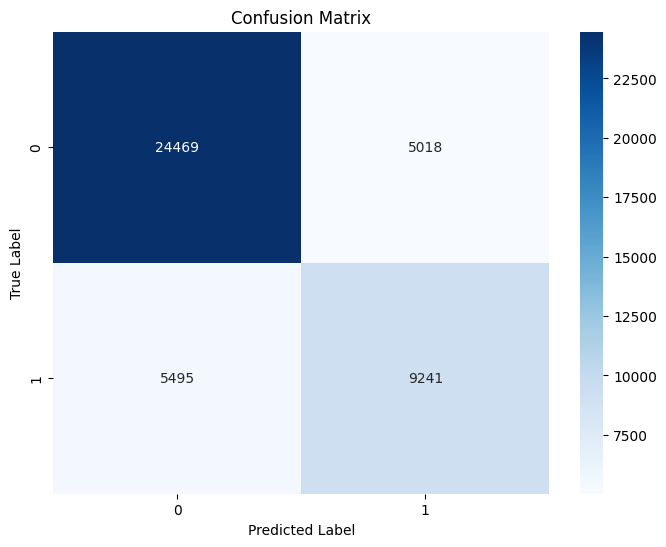

In [15]:
# Plot confusion matrix
cm = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title(f'Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

## **Naive Bayes Sklearn**

In [16]:
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [17]:
nb_model_sklearn = BernoulliNB()
nb_model_sklearn.fit(X_train_scaled, y_train)
y_val_pred = nb_model_sklearn.predict(X_val_scaled)
metrics_sklearn = {
    'accuracy': accuracy_score(y_val, y_val_pred),
    'precision': precision_score(y_val, y_val_pred, average='weighted'),
    'recall': recall_score(y_val, y_val_pred, average='weighted'),
    'f1': f1_score(y_val, y_val_pred, average='weighted'),
    'classification_report': classification_report(y_val, y_val_pred)
}

print("Sklearn Naive Bayes Metrics on Validation Set:")
print("Accuracy:", metrics_sklearn['accuracy'])
print("Precision:", metrics_sklearn['precision'])
print("Recall:", metrics_sklearn['recall'])
print("F1 Score:", metrics_sklearn['f1'])
print("=====================================================")
print("Classification Report:", metrics_sklearn['classification_report'])


Sklearn Naive Bayes Metrics on Validation Set:
Accuracy: 0.7577731044931371
Precision: 0.7548861663111023
Recall: 0.7577731044931371
F1 Score: 0.7560895579111194
Classification Report:               precision    recall  f1-score   support

           0       0.81      0.83      0.82     29487
           1       0.64      0.61      0.63     14736

    accuracy                           0.76     44223
   macro avg       0.73      0.72      0.72     44223
weighted avg       0.75      0.76      0.76     44223



In [18]:
y_test_pred = nb_model_sklearn.predict(X_test_scaled)

print("Sklearn Naive Bayes Metrics on Test Set:")
print("Accuracy:", accuracy_score(y_test, y_test_pred))
print("Precision:", precision_score(y_test, y_test_pred, average='weighted'))
print("Recall:", recall_score(y_test, y_test_pred, average='weighted'))
print("F1 Score:", f1_score(y_test, y_test_pred, average='weighted'))
print("=====================================================")
print("Classification Report")
print(classification_report(y_test, y_test_pred))


Sklearn Naive Bayes Metrics on Test Set:
Accuracy: 0.7598986952490785
Precision: 0.7565442341574492
Recall: 0.7598986952490785
F1 Score: 0.7578744682887969
Classification Report
              precision    recall  f1-score   support

           0       0.81      0.84      0.82     29487
           1       0.65      0.61      0.63     14736

    accuracy                           0.76     44223
   macro avg       0.73      0.72      0.73     44223
weighted avg       0.76      0.76      0.76     44223



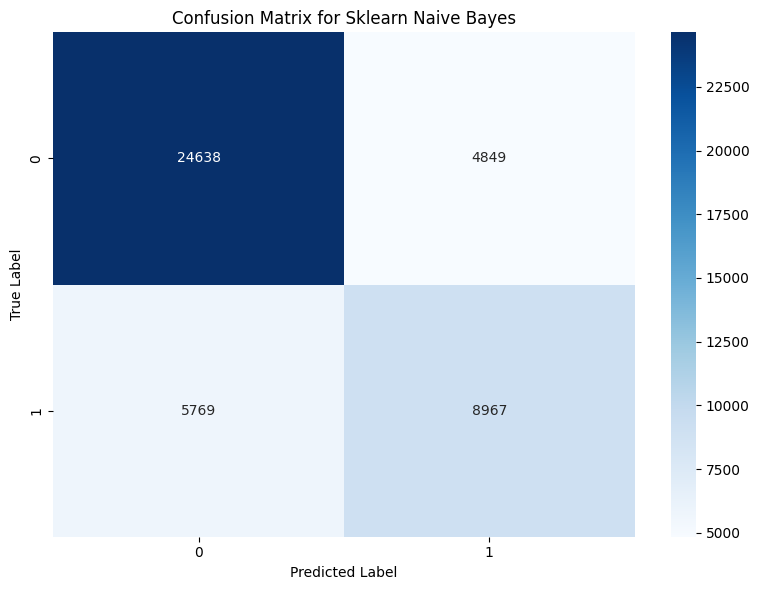

In [19]:
# Plot confusion matrix
conf_matrix = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title(f'Confusion Matrix for Sklearn Naive Bayes')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.tight_layout()
plt.show()